- Fuentes y recursos

https://drive.google.com/file/d/0B-dmEvN59Z2ZMmlLVGQtUTJaclk/view?resourcekey=0-lCudojMgncfUG0goSORlRw

In [11]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

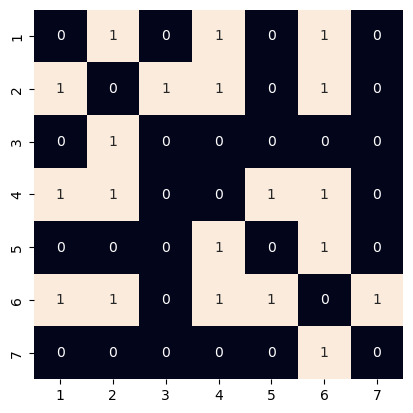

In [14]:
data = pd.read_csv("sample_adjmatrix.csv", index_col=0)
sns.heatmap(data, cbar=False, square=True, annot=True)

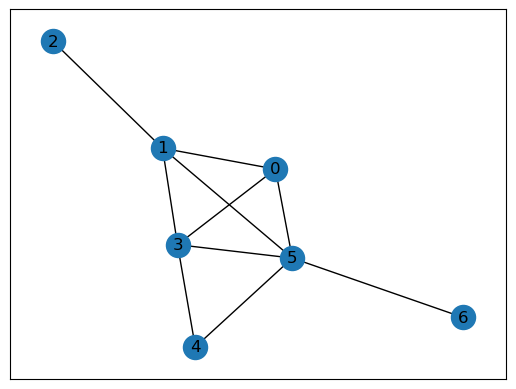

In [18]:
G = nx.from_numpy_array(data.values)
nx.draw_networkx(G)

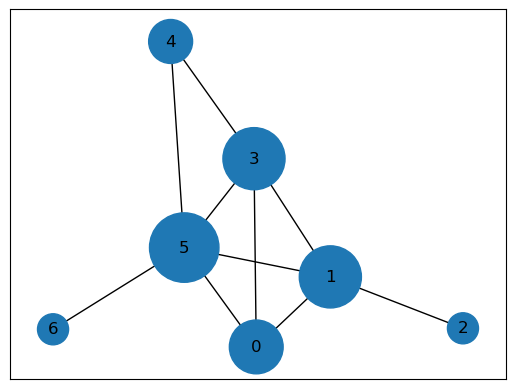

In [31]:
size = [v * 500 for v in d.values()]
d = dict(G.degree)
nx.draw_networkx(G, nodelist=d.keys(), node_size=[v * 500 for v in d.values()])

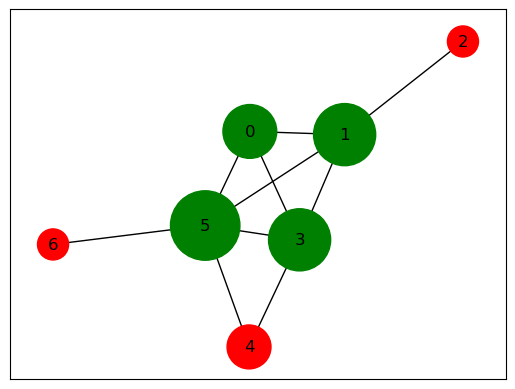

In [33]:
color_map = ['red' if d[node] <= 2 else 'green' for node in G] 
nx.draw_networkx(G, nodelist=d.keys(), node_size=size, node_color=color_map)

<AxesSubplot: >

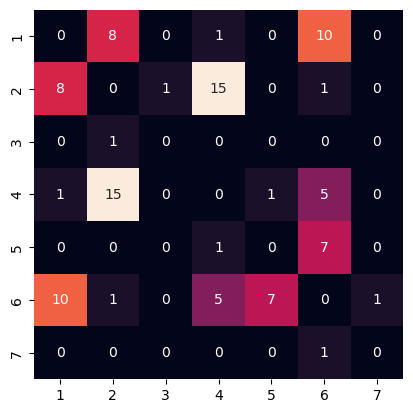

In [34]:
data = pd.read_csv("sample_adjmatrix_weights.csv", index_col=0)
sns.heatmap(data, cbar=False, square=True, annot=True)

In [36]:
G = nx.from_numpy_array(data.values)
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 8}), (0, 3, {'weight': 1}), (0, 5, {'weight': 10}), (1, 2, {'weight': 1}), (1, 3, {'weight': 15}), (1, 5, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 5}), (4, 5, {'weight': 7}), (5, 6, {'weight': 1})])

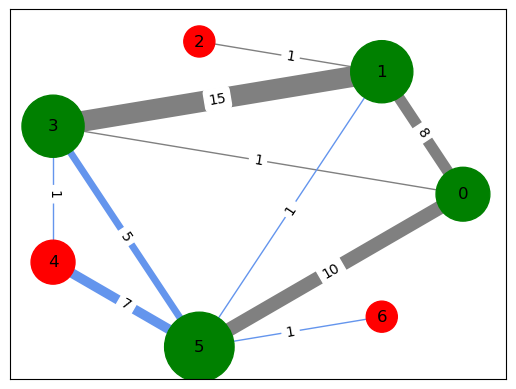

In [71]:
pos = nx.circular_layout(G)  # fix layout

labels = nx.get_edge_attributes(G,'weight')

weights = [G[u][v]['weight'] for u,v in G.edges()]

c = len(weights)//2

colors = ['gray']*c +  ['cornflowerblue']*c

nx.draw_networkx(G, pos, nodelist=d.keys(), edge_color=colors, node_size=size, node_color=color_map, width=weights)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [83]:
data = pd.read_csv("seervadaPark.csv")
data

,from,to,capacity,weight
0,O,A,5,2
1,O,B,7,5
2,O,C,4,4
3,A,B,1,2
4,A,D,3,7
5,B,C,2,1
6,B,D,4,4
7,B,E,5,3
8,C,E,4,4
9,D,E,1,1


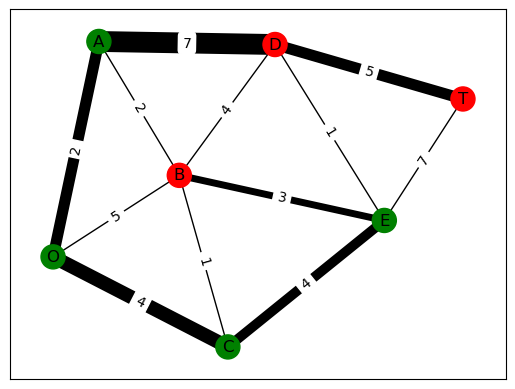

In [104]:
G = nx.from_pandas_edgelist(data, 'from', 'to', edge_attr='weight')

# fix layout
pos = {'O': np.array([-0.82096643, -0.49320922]),
 'A': np.array([-0.61981365,  0.71888781]),
 'B': np.array([-0.26709425, -0.03448086]),
 'C': np.array([-0.05407535, -1.        ]),
 'D': np.array([0.15271144, 0.70175414]),
 'E': np.array([ 0.63215728, -0.28829448]),
 'T': np.array([0.97708096, 0.39534261])}

labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, node_color=color_map, width=weights)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

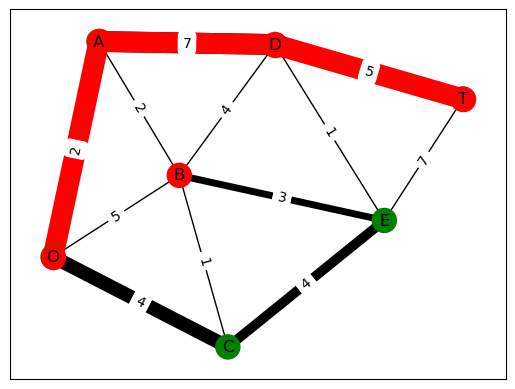

In [106]:
path = nx.shortest_path(G,source='O',target='T')
nx.draw_networkx(G, pos, node_color=color_map, width=weights)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r', width=15)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

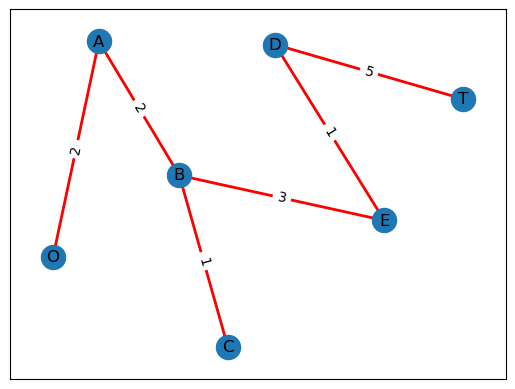

In [151]:
T = nx.algorithms.minimum_spanning_tree(G)

labels = nx.get_edge_attributes(T, 'weight')

nx.draw_networkx(T, pos)
nx.draw_networkx_edges(T,pos, edgelist=T.edges,edge_color='r', width=2)
nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);

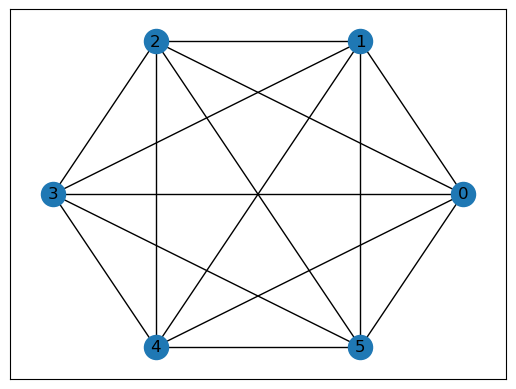

In [163]:
G = nx.complete_graph(6)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

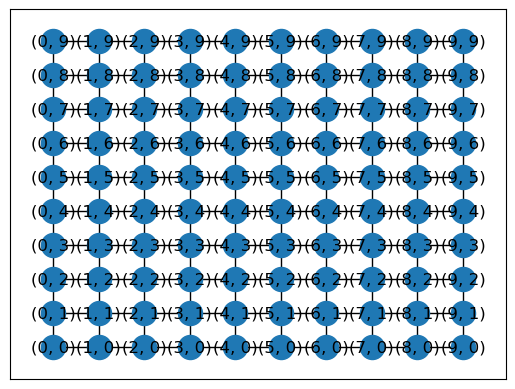

In [238]:
grid_size = 10

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

nx.draw_networkx(G, pos=pos, with_labels=True)

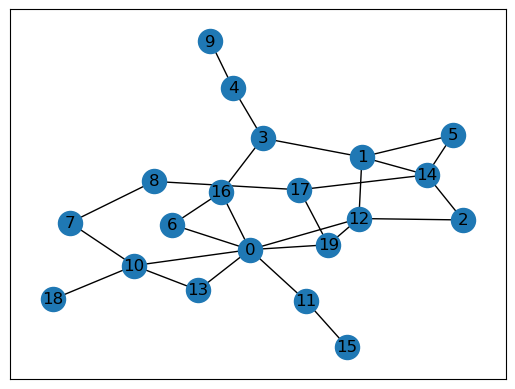

In [173]:
G = nx.erdos_renyi_graph(20, 0.125)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos)

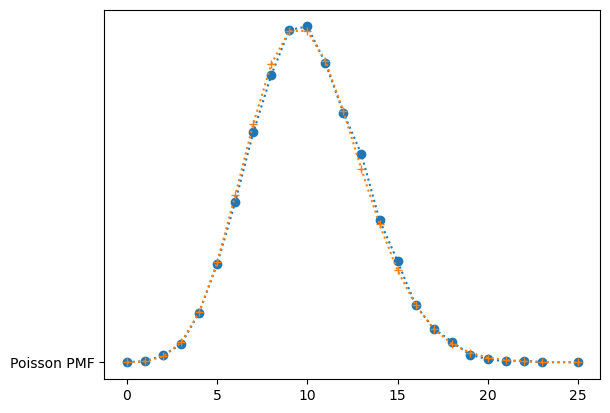

In [187]:
from scipy.stats import poisson

G = nx.erdos_renyi_graph(10000,0.001)

degree = [d[1] for d in G.degree]

d, f = np.unique(degree, return_counts=True)

plt.plot(d, f/f.sum(), ':o', label='Network degree')
plt.plot(d, poisson.pmf(d, 10000*0.001), ':+', 'Poisson PMF')

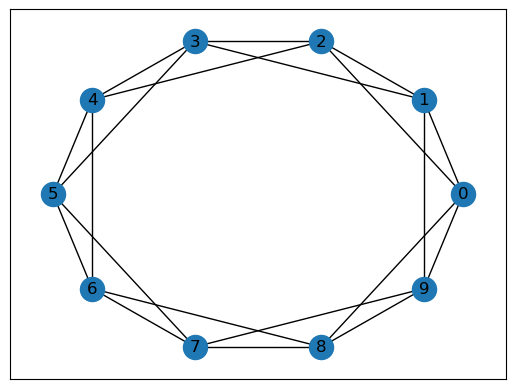

In [224]:
G = nx.watts_strogatz_graph(10, 4, 0.0)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

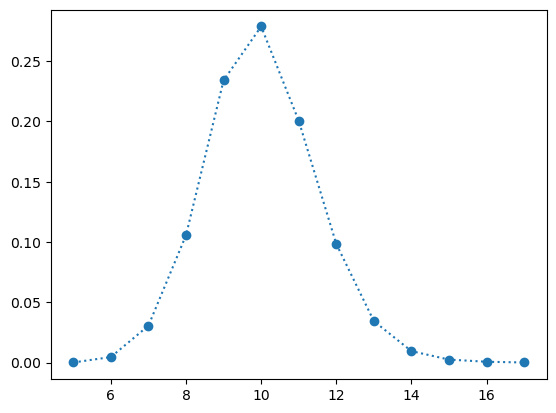

In [236]:
k = int(10000*0.001)
G = nx.watts_strogatz_graph(10000, k, 0.25)

degree = [d[1] for d in G.degree]

d, f = np.unique(degree, return_counts=True)

plt.plot(d, f/f.sum(), ':o', label='Network degree')

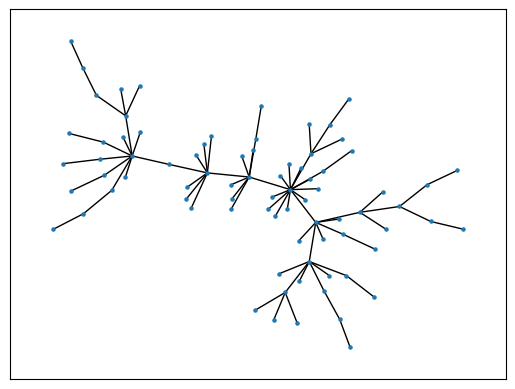

In [205]:
G = nx.barabasi_albert_graph(n = 80, m = 1)

pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=5)

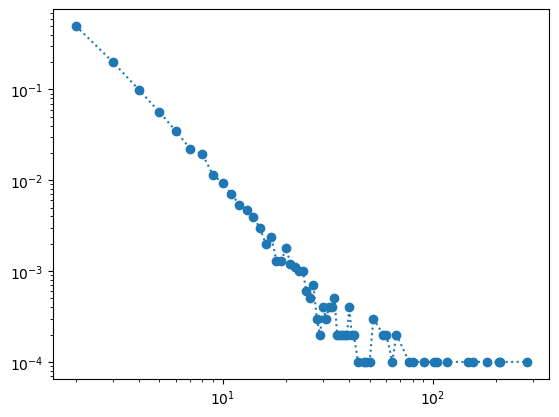

In [223]:
G = nx.barabasi_albert_graph(n = 10000, m = 2)

degree = [d[1] for d in G.degree]

d, f = np.unique(degree, return_counts=True)

plt.loglog(d, f/f.sum(), ':o', label='Network degree')